# MTH 9875 The Volatility Surface:    Fall 2016
<p>

### Lecture 13: Rough volatility
<p>

Jim Gatheral   
Department of Mathematics     

  
<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2016/04/MFE-Logo.jpg" align = "right" width=500></h3>

### Outline of Lecture 13

* The time series of historical volatility
    - Scaling properties


* The RFSV model


* The Rough Bergomi model


* The Rough Heston model

* Forecasting realized variance


* The time series of variance swaps


* Relating historical and implied

$$
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\ben}{\begin{enumerate}}
\newcommand{\een}{\end{enumerate}}
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\bv}{\begin{verbatim}}
\newcommand{\ev}{\end{verbatim}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\mP}{\mathbb{P}}
\newcommand{\mQ}{\mathbb{Q}}
\newcommand{\sigl}{\sigma_L}
\newcommand{\BS}{\rm BS}
\newcommand{\vix}{\text{VIX}}
\newcommand{\p}{\partial}
\newcommand{\var}{{\rm var}}
\newcommand{\cov}{{\rm cov}}
\newcommand{\mt}{\mathbf{t}}
\newcommand{\mS}{\mathbf{S}}
\newcommand{\tC}{\widetilde{C}}
\newcommand{\hC}{\widehat{C}}
\newcommand{\cE}{\mathcal{E}}
\newcommand{\tH}{\widetilde{H}}
\newcommand{\cD}{\mathcal{D}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\cS}{\mathcal{S}}
\newcommand{\cR}{\mathcal{R}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cV}{\mathcal{V}}
\newcommand{\cG}{\mathcal{G}}
\newcommand{\cv}{\mathcal{v}}
\newcommand{\cg}{\mathcal{g}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\dt}{\Delta t}
\newcommand{\tr}{{\rm tr}}
\newcommand{\sgn}{\mathrm{sign}}
\newcommand{\ee}[1]{{\mathbb{E}\left[{#1}\right]}}
\newcommand{\eef}[1]{{\mathbb{E}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\eefm}[2]{{\mathbb{E}^{#2}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\angl}[1]{{\langle{#1}\rangle}}
$$

### The time series of realized variance

- Assuming an underlying variance process $v_s$, integrated variance $\frac 1 \delta \,\int_t^{t+\delta}\,v_s\,ds$ may (in principle) be estimated arbitrarily accurately given enough price data.

    - In practice, market microstructure noise makes estimation harder at very high frequency.
    - Sophisticated estimators of integrated variance have been developed to adjust for market microstructure noise.  See Gatheral and Oomen <sup id="cite_ref-GO" class="reference"><a href="#cite_note-GO"><span>[</span>8<span>]</span></a></sup> (for example) for details of these.

- The Oxford-Man Institute of Quantitative Finance makes historical realized variance (RV) estimates freely available at http://realized.oxford-man.ox.ac.uk.  These estimates are updated daily.

    - Each day, for 21 different indices, all trades and quotes are used to estimate realized (or integrated) variance over the trading day from open to close.



- Using daily RV estimates as proxies for instantaneous variance, we may investigate the time series properties of $v_t$ empirically.

First update and save the latest Oxford-Man data:

In [2]:
download.file(url="http://realized.oxford-man.ox.ac.uk/media/1366/oxfordmanrealizedvolatilityindices.zip", destfile="oxfordRvData.zip")
unzip(zipfile="oxfordRvData.zip")


There are many different estimates of realized variance, all of them very similar.  We will use the realized kernel estimates denoted by ".rk".

In [3]:
library(xts)

rv.data <- read.csv("OxfordManRealizedVolatilityIndices.csv")
colnums <- which(sapply(rv.data, function(x) grep(".rk",x))>0)
col.names <- names(colnums)

rv1 <- rv.data[,colnums]
index.names <- rv1[2,]

datesRaw <- rv.data[-(1:2),1]
dates <- strptime(datesRaw,"%Y%m%d")

rv.list <- NULL
index.names <- as.matrix(index.names)

n <- length(index.names)
for (i in 1:n){
    tmp.krv1 <- xts(rv1[-(1:2),i],order.by=dates) 
    rv.list[[i]] <- tmp.krv1[(tmp.krv1!="")&(tmp.krv1!="0")]
}

names(rv.list)<- index.names 

save(rv.list, file="oxfordRV.rData")

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Let's plot SPX realized variance.

In [4]:
# Load Oxford-Man KRV data
load("oxfordRV.rData")
names(rv.list)

spx.rk <- rv.list[["SPX2.rk"]]

[1] "SPX2.rk"     "FTSE2.rk"    "N2252.rk"    "GDAXI2.rk"   "RUT2.rk"    
 [6] "AORD2.rk"    "DJI2.rk"     "IXIC2.rk"    "FCHI2.rk"    "HSI2.rk"    
[11] "KS11.rk"     "AEX.rk"      "SSMI.rk"     "IBEX2.rk"    "NSEI.rk"    
[16] "MXX.rk"      "BVSP.rk"     "GSPTSE.rk"   "STOXX50E.rk" "FTSTI.rk"   
[21] "FTSEMIB.rk"

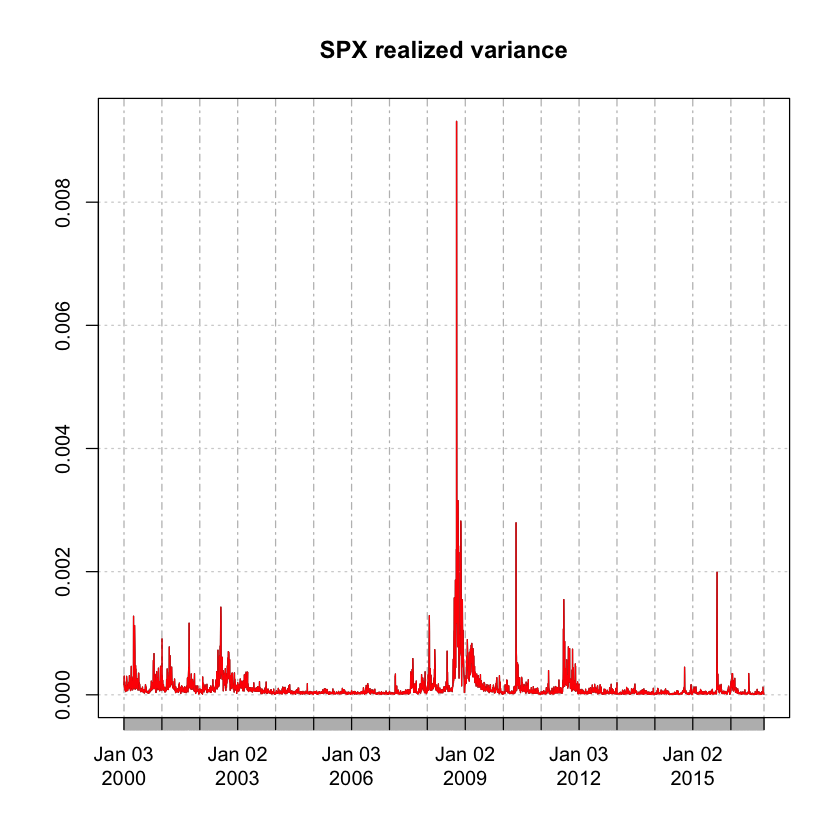

In [5]:
plot(spx.rk, main="SPX realized variance",plot=NULL)
lines(spx.rk,col="red")

Figure 1: Oxford-Man KRV estimates of SPX realized variance from January 2000 to the current date.

In [6]:
print(head(spx.rk))
print(tail(spx.rk))

           [,1]                  
2000-01-03 "0.000160726642338866"
2000-01-04 "0.000264396469319473"
2000-01-05 "0.000304650302935347"
2000-01-06 "0.000148582063339039"
2000-01-07 "0.000123266970191763"
2000-01-10 "0.000130693391920629"
           [,1]                  
2016-11-11 "3.88529370535868E-05"
2016-11-14 "3.77191023078828E-05"
2016-11-15 "1.32925868381015E-05"
2016-11-16 "1.40111774817457E-05"
2016-11-17 "1.05008819885492E-05"
2016-11-18 "9.10491791187494E-06"


We can get SPX data from Yahoo using the quantmod package:

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


[1] "GSPC"

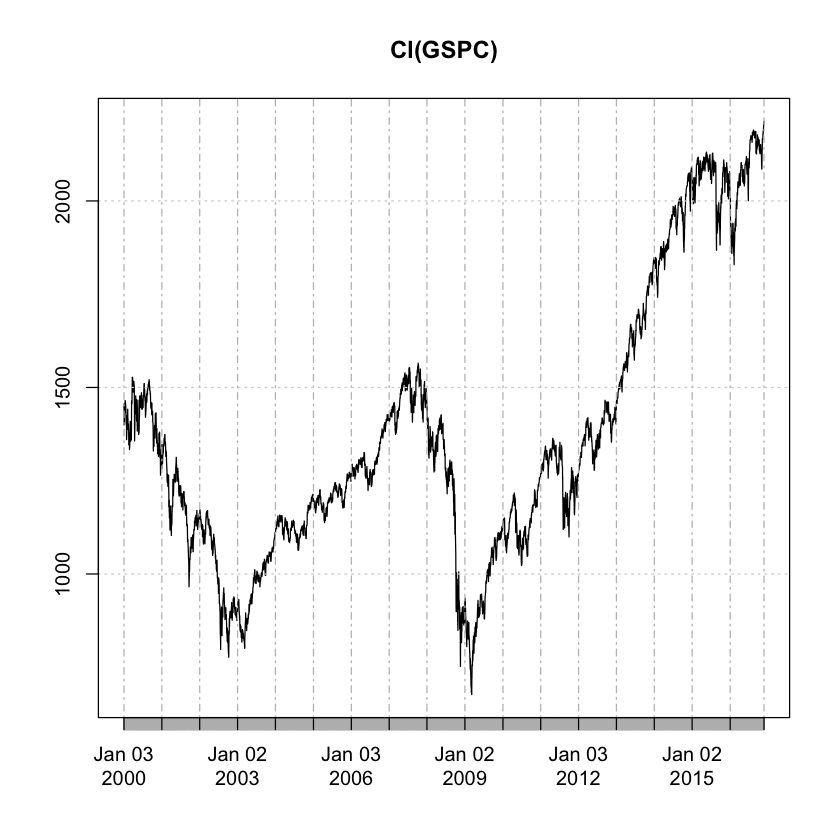

In [7]:
library(quantmod)

options("getSymbols.warning4.0"=FALSE)
getSymbols("^GSPC",from="2000-01-01") #Creates the time series object GSPC

plot(Cl(GSPC))

### The smoothness of the volatility process


For $q\geq 0$, we define the $q$th sample moment of differences of log-volatility at a given lag $\Delta$.($\angl{\cdot}$ denotes the sample average):

$$
m(q,\Delta)=\angl{\left|\log \sigma_{t+\Delta} -\log \sigma_{t} \right|^q}
$$

For example

$$
m(2,\Delta)=\angl{\left(\log \sigma_{t+\Delta} -\log \sigma_{t} \right)^2}
$$

is just the sample variance of differences in log-volatility at the lag $\Delta$.




### Scaling of $m(q,\Delta)$ with lag $\Delta$

In [8]:
sig <- sqrt(as.numeric(spx.rk))

mq.del.Raw <- function(q,lag){mean(abs(diff(log(sig),lag=lag))^q)}
mq.del <- function(x,q){sapply(x,function(x){mq.del.Raw(q,x)})}

# Plot mq.del(1:100,q) for various q

x <- 1:100

mycol <- rainbow(5)

ylab <- expression(paste(log," ",m(q,Delta)))
xlab <- expression(paste(log, " ", Delta))

qVec <- c(.5,1,1.5,2,3)
zeta.q <- numeric(5)
q <- qVec[1]

[1] 0.07182624 0.14027654 0.20530119 0.26698821 0.38089255


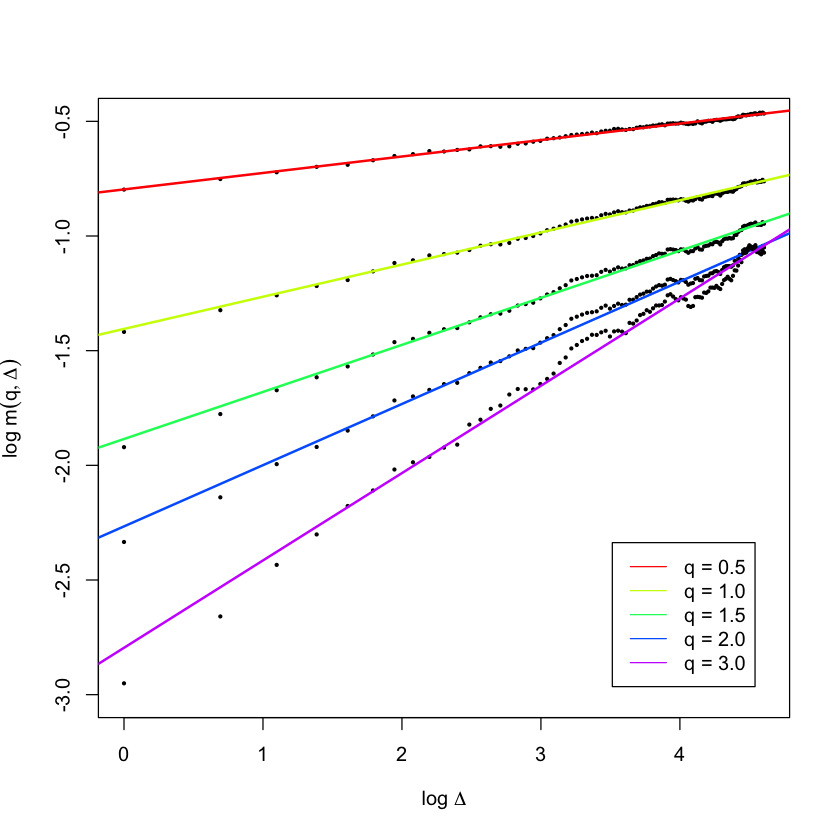

In [9]:
plot(log(x),log(mq.del(x,q)),pch=20,cex=.5,
         ylab=ylab, xlab=xlab,ylim=c(-3,-.5))
fit.lm <- lm(log(mq.del(x,q)) ~ log(x))
abline(fit.lm, col=mycol[1],lwd=2)
zeta.q[1] <- coef(fit.lm)[2]

for (i in 2:5){
    q <- qVec[i]
    points(log(x),log(mq.del(x,q)),pch=20,cex=.5)
    fit.lm <- lm(log(mq.del(x,q)) ~ log(x))
    abline(fit.lm, col=mycol[i],lwd=2)
    zeta.q[i] <- coef(fit.lm)[2]
    }
legend("bottomright", c("q = 0.5","q = 1.0","q = 1.5","q = 2.0","q = 3.0"),inset=0.05, lty=1, col = mycol)

print(zeta.q)

Figure 2: $\log m(q,\Delta)$ as a function of $\log \Delta$, SPX.

### Monofractal scaling result

- From the above log-log plot, we see that for each $q$, $m(q,\Delta) \propto \Delta ^{\zeta_q}$.


- How does $\zeta_q$ scale with $q$?

### Scaling of $\zeta_q$ with $q$

qVec[1:4] 
 0.135749

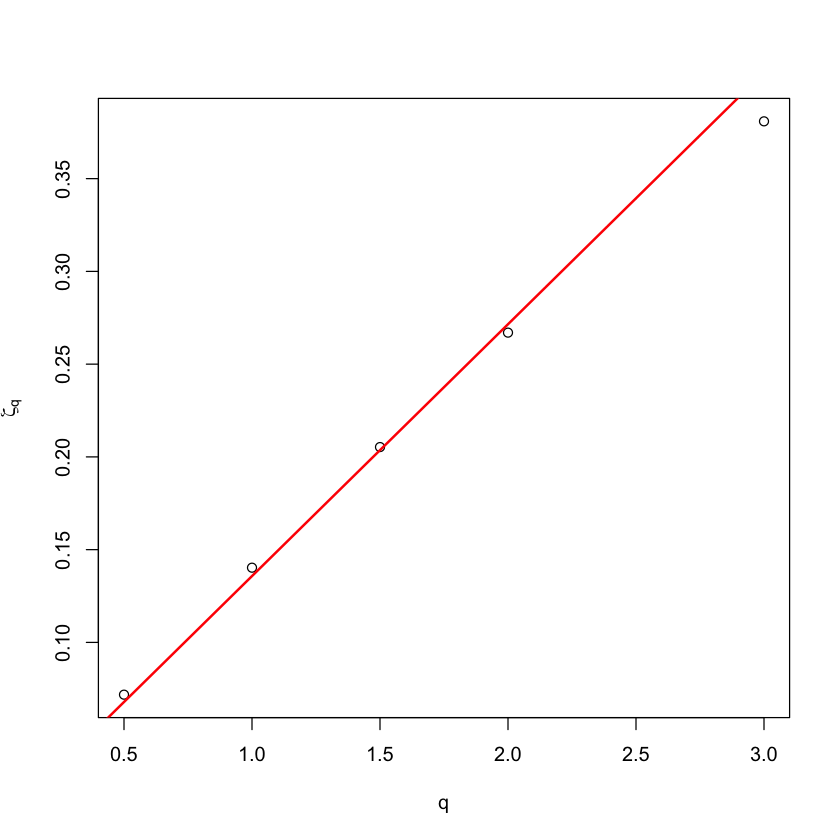

In [10]:
plot(qVec,zeta.q,xlab="q",ylab=expression(zeta[q]))
fit.lm <- lm(zeta.q[1:4] ~ qVec[1:4]+0)
abline(fit.lm, col="red",lwd=2)
(h.est <- coef(fit.lm)[1])

Figure 3: Scaling of $\zeta_q$ with $q$.

We find the monofractal scaling relationship

$$
\zeta_q = q\,H
$$

with $H \approx 0.14$.

- Note however that $H$ does vary over time, in a narrow range.


- Note also that our estimate of $H$ is biased high because we proxied instantaneous variance $v_t$ with its average over each day $\frac 1T\,\int_0^T\,v_t\,dt$, where $T$ is one trading day.

### Estimated $H$ for all indices

We now repeat this analysis for all 21 indices in the Oxford-Man dataset.

In [34]:
n <- length(rv.list)
h <- numeric(n) # H is estimated as half of the slope
nu <- numeric(n)

for (i in 1:n){ # Run all the regressions
  v <- rv.list[[i]]
  sig <- sqrt(as.numeric(v))
    
  x <- 1:100
  dlsig2 <- function(lag){mean((diff(log(sig),lag=lag))^2)}
  dlsig2Vec <- function(x){sapply(x,dlsig2)}

  fit.lm <- lm(log(dlsig2Vec(x)) ~ log(x))

  nu[i] <- sqrt(exp(coef(fit.lm)[1]))
  h[i] <- coef(fit.lm)[2]/2
  
}

In [35]:
(OxfordH <- data.frame(names(rv.list),h.est=h,nu.est=nu))

names.rv.list.,h.est,nu.est
SPX2.rk,0.13349411,0.3220229
FTSE2.rk,0.14170064,0.2699289
N2252.rk,0.11120297,0.3265653
GDAXI2.rk,0.14910897,0.2747962
RUT2.rk,0.12057900,0.3309663
AORD2.rk,0.08240313,0.3610350
DJI2.rk,0.13051274,0.3179099
IXIC2.rk,0.12695429,0.2961560
FCHI2.rk,0.12927299,0.2926321
HSI2.rk,0.10150356,0.2821015


### Distributions of $(\log \sigma_{t+\Delta}-\log \sigma_t)$ for various lags $\Delta$

Having established these beautiful scaling results for the moments, how do the histograms look?

In [12]:
plotScaling <- function(j,scaleFactor){
  v <- as.numeric(rv.list[[j]])
  x <- 1:100
  
  xDel <- function(x,lag){diff(x,lag=lag)}
  sd1 <- sd(xDel(log(v),1))
  sdl <- function(lag){sd(xDel(log(v),lag))}

  h <- OxfordH$h.est[j]
  
  plotLag <- function(lag){
    y <- xDel(log(v),lag)
    hist(y,breaks=100,freq=F,main=paste("Lag =",lag,"Days"),xlab=NA)# Very long tailed!
    curve(dnorm(x,mean=mean(y),sd=sd(y)),add=T,col="red",lwd=2)
    curve(dnorm(x,mean=0,sd=sd1*lag^h),add=T,lty=2,lwd=2,col="blue")
    lines(density(y)$x,density(y)$y,col="dark green",lty=3,lwd=3)
  }
  
  (lags <- scaleFactor^(0:3))
  print(names(rv.list)[j])
  par(mfrow=c(2,2))
  par(mar=c(3,2,1,3))
  for (i in 1:4){plotLag(lags[i])}
  par(mfrow=c(1,1))
}

[1] "SPX2.rk"


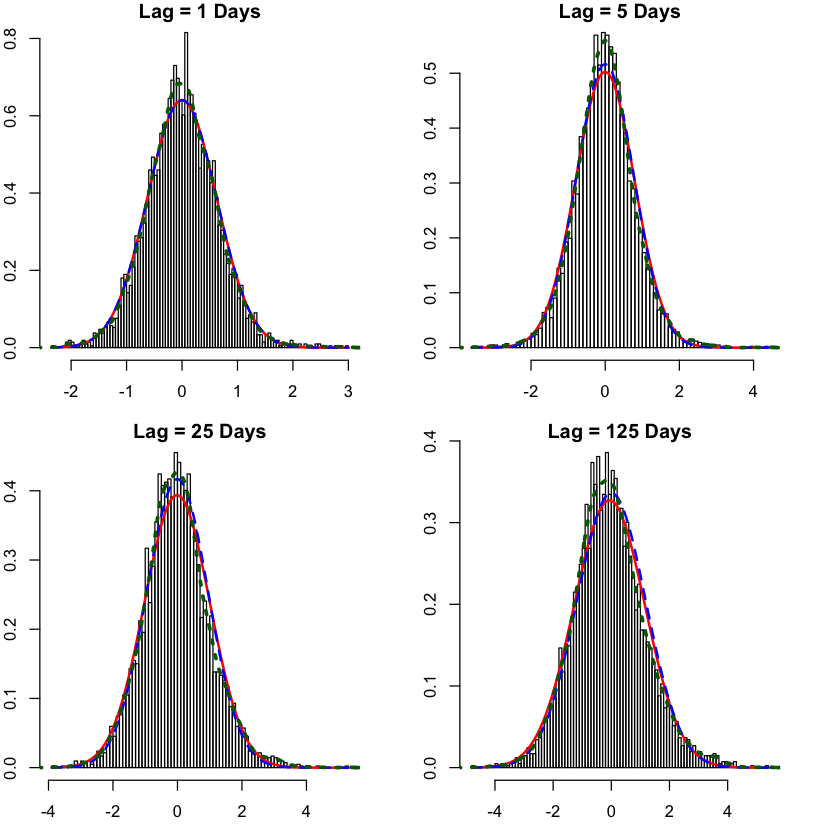

In [13]:
plotScaling(1,5)

Figure 4: Histograms of $(\log \sigma_{t+\Delta}-\log \sigma_t)$ for various lags $\Delta$; normal fit in red; $\Delta=1$ normal fit scaled by $\Delta^{0.14}$ in blue.


### Universality?

- <span>[Gatheral, Jaisson and Rosenbaum]<sup id="cite_ref-GJR" class="reference"><a href="#cite_note-GJR"><span>[</span>7<span>]</span></a></sup> compute daily realized variance estimates over one hour windows for DAX and Bund futures contracts, finding similar scaling relationships.


- We have also checked that Gold and Crude Oil futures scale similarly.

    - Although the increments $(\log \sigma_{t+\Delta}-\log \sigma_t)$ seem to be fatter tailed than Gaussian.  

### A natural model of realized volatility

- Distributions of differences in the log of realized volatility are close to Gaussian.

    - This motivates us to model $\sigma_t$ as a lognormal random variable.


- Moreover, the scaling property of variance of RV differences suggests the model:

<a name="eq:dataDriven"></a>(1)
$$
\log \sigma_{t+\Delta} - \log \sigma_t =\nu\,\left( W^H_{t+\Delta}-W^H_t\right)
$$

where $W^H$ is fractional Brownian motion.

- In  <span>[Gatheral, Jaisson and Rosenbaum]<sup id="cite_ref-GJR" class="reference"><a href="#cite_note-GJR"><span>[</span>9<span>]</span></a></sup>, we refer to a stationary version of [(1)](#eq:dataDriven) as the RFSV (for Rough Fractional Stochastic Volatility) model.

### Fractional Brownian motion (fBm)

- *Fractional Brownian motion* (fBm) $\{W^H_t; t \in \mathbb{R}\}$ is the unique Gaussian process with mean zero and autocovariance function
$$
\ee{ W^H_t\,W^H_s  } = \frac12\,\left\{ |t|^{2\,H}+|s|^{2\,H}-|t-s|^{2\,H}  \right\}
$$
where $H \in (0,1)$ is called the *Hurst index* or parameter.
   - In particular, when $H=1/2$, fBm is just Brownian motion.
 
   - If $H>1/2$, increments are positively correlated.% so the process is trending.
   - If $H<1/2$, increments are negatively correlated.% so the process is reverting.

 

### Representations of fBm

There are infinitely many possible representations of fBm in terms of Brownian motion.  For example, with $\gamma = \frac 12 - H$,


<blockquote><div style="background-color:#add8e6; color:#FFFFFF; font-style: normal;  " ><h4>
Mandelbrot-Van Ness</h4>
</div>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>

$$
W^H_t ={C_H}\,\left\{\int_{-\infty}^t \,\frac{dW_s}{(t-s)^\gamma} - \int_{-\infty}^0 \,\frac{dW_s}{(-s)^\gamma}\right\}.
$$
<br>

</div>

</blockquote>

where the choice

$$
C_H = \sqrt{ \frac{2\,H\,\Gamma(3/2-H)}{\Gamma(H+1/2)\,\Gamma(2-2\,H)}}
$$

ensures that

$$
\ee{W^H_t\,W^H_s }= \frac{1}{2}\,\left\{t^{2 H} + s^{2 H} - |t-s|^{2 H}\right\}.
$$


### Comte and Renault: FSV model

<span>[Comte and Renault]<sup id="cite_ref-ComteRenault" class="reference"><a href="#cite_note-ComteRenault"><span>[</span>5<span>]</span></a></sup> were perhaps the first to model volatility using fractional Brownian motion.  

In their fractional stochastic volatility (FSV) model,

$$
\bea
\frac{dS_t}{S_t} &=& \sigma_t\,dZ_t\nonumber\\
d\log \sigma_t &=& -\alpha\,(\log \sigma_t - \theta)\,dt+ \gamma\,d\hat W^H_t
%\label{eq:FSV}
\eea
$$

with

$$
\hat W^H_t = \int_0^t\,\frac{(t-s)^{H-1/2}}{\Gamma(H+1/2)}\,dW_s,\quad 1/2 \leq H < 1
$$

and $\ee{dW_t\,dZ_t}=\rho\,dt$.

- The FSV model is a generalization of the Hull-White stochastic volatility model.

### RFSV and FSV

 
  - The model [(1)](#eq:dataDriven):
$$
\log \sigma_{t+\Delta} - \log \sigma_t =\nu\,\left( W^H_{t+\Delta}-W^H_t\right)
$$
is not stationary.
 
 
- Stationarity is desirable both for mathematical tractability and also to ensure reasonableness of the model at very large times. 
  
  
- The RFSV model (the stationary version of [(1)](#eq:dataDriven) is formally identical to the FSV model.  Except that
 
  - $H<1/2$ in RFSV vs $H>1/2$ in FSV.
  - $\alpha\,T \gg1$  in RFSV vs $\alpha\,T \sim 1$ in FSV,
  where $T$ is a typical timescale of interest.


  

### Heuristic derivation of autocorrelation function

We assume that $\sigma_t = {\bar \sigma}_t\,e^{\nu\,W^H_t}$.  Then

$$
\beas
&&\cov\left[\sigma_t,\sigma_{t+\Delta}\right]\\
&=& {\bar \sigma}_t\,{\bar \sigma}_{t+\Delta}\,\left[\exp\left\{ \frac {\nu^2}2\,\left(t^{2\,H} +(t+\Delta)^{2\,H} - \Delta^{2\,H}\right)  \right\}-1\right]\\
& \sim& {\bar \sigma}_t\,{\bar \sigma}_{t+\Delta}\,\exp\left\{ \frac {\nu^2}2\,\left(t^{2\,H} +(t+\Delta)^{2\,H} - \Delta^{2\,H}\right)  \right\} \text{ as } t \to \infty.
\eeas
$$

Similarly,
$
\var\left[\sigma_t\right] \sim {\bar \sigma}_t^2\,\exp\left\{ {\nu^2}\,t^{2\,H}\right\}
$ as $t \to \infty$.  Thus
$$
\rho(\Delta)=\frac{\cov\left[\sigma_t,\sigma_{t+\Delta}\right]}{\sqrt{\var\left[\sigma_t\right] \,\var\left[\sigma_{t+\Delta}\right] }} \sim \exp\left\{-\frac{\nu^2}{2}\,\Delta^{2\,H}\right\}.
$$


### FSV and long memory

 
- Why did <span>[Comte and Renault]<sup id="cite_ref-ComteRenault" class="reference"><a href="#cite_note-ComteRenault"><span>[</span>6<span>]</span></a></sup> choose $H>1/2$?
 
  - Because it has been a widely-accepted stylized fact that the volatility time series exhibits long memory.  

- In this technical sense, *long memory* means that the autocorrelation function of volatility decays as a power-law.

- One of the influential papers that established this was  <span>[Andersen, Bollerslev, Diebold and Ebens]<sup id="cite_ref-ABDE" class="reference"><a href="#cite_note-ABDE"><span>[</span>1<span>]</span></a></sup> which estimated the degree $d$ of fractional integration from daily realized variance data for the 30 DJIA stocks.
 
  - Using the GPH (Geweke-Porter-Hudak) estimator, they found $d$ around $0.35$ which implies that the ACF $\rho(\tau)  \sim \tau^{2\,d-1} = \tau ^{-0.3}$ as $\tau \to \infty$.
 
 

- But every statistical estimator assumes the validity of some underlying model!
 
 
- In the RFSV model, 
$$
\rho(\Delta) \sim \exp\left\{-\frac{\nu^2}{2}\,\Delta^{2\,H}\right\}.
$$
 
 
- Using the same GPH estimator on the Oxford-Man RV data we find $d = 0.48$ which according to their test would indicate extreme long memory.  But our model [(1)](#eq:dataDriven) is different from that of <span>[Andersen, Bollerslev, Diebold and Ebens]<sup id="cite_ref-ABDE" class="reference"><a href="#cite_note-ABDE"><span>[</span>1<span>]</span></a></sup>; it does not have long memory.

  

### Correlogram and test of scaling

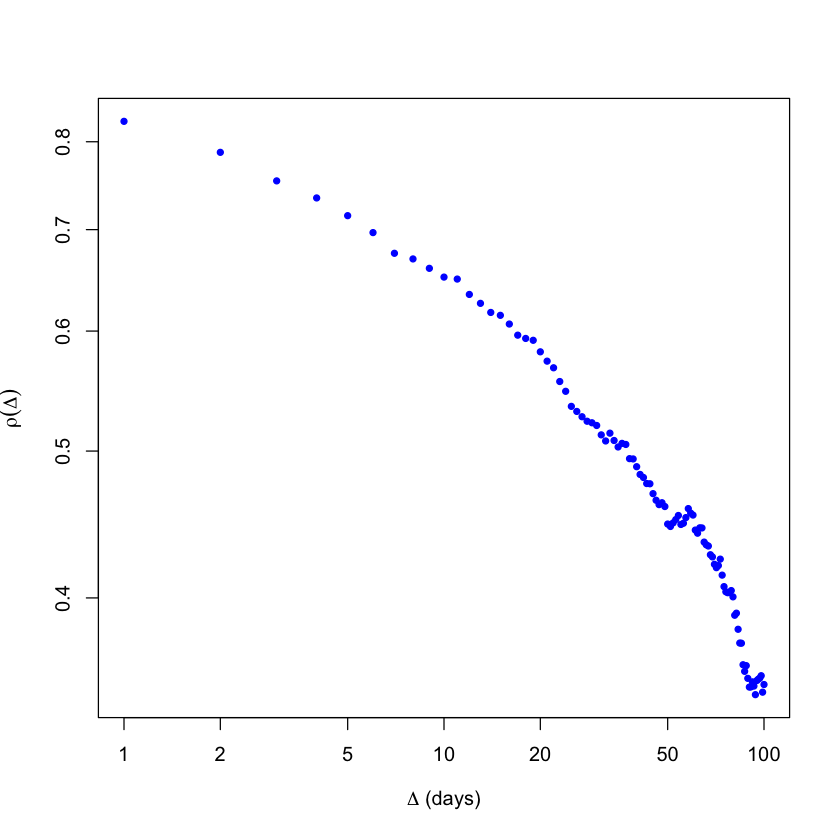

In [14]:
v <- rv.list[[1]]  # Pick spx.rk
sig <- sqrt(as.numeric(v))

aclog <-acf(log(sig),lag=100,plot=F)
plot(aclog$lag[-1],aclog$acf[-1],pch=20,ylab=expression(rho(Delta)),xlab=expression(paste(Delta," (days)")),log="xy",col="blue")

Figure 5: A correlogram of $\sigma_t=\sqrt{RV_t}$; it doesn't look linear!

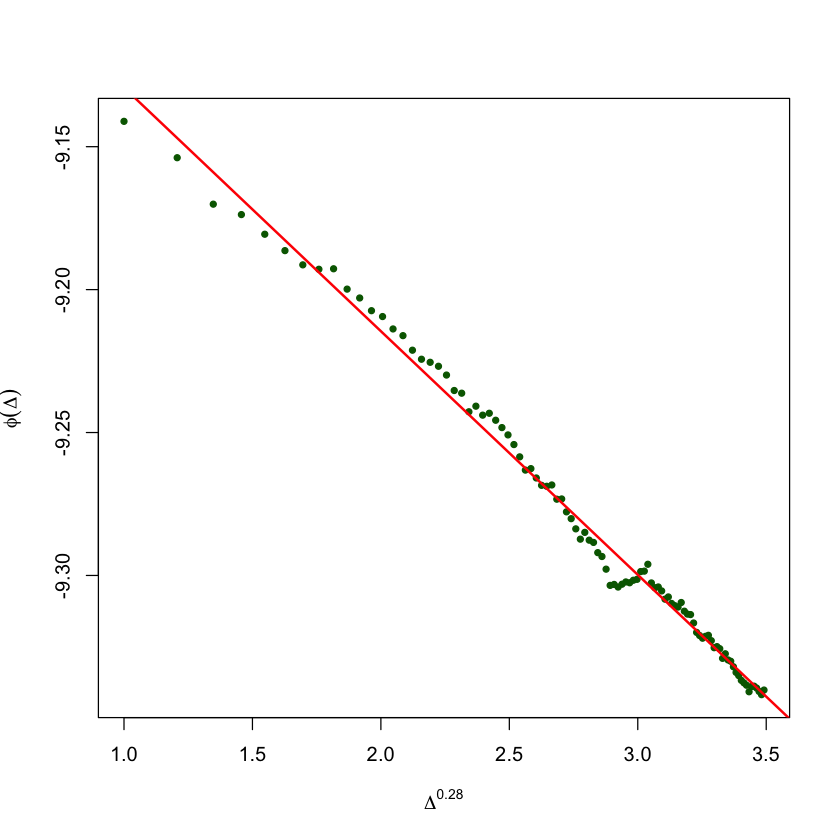

In [15]:
esig2 <- mean(sig)^2
covdel <- acf(sig,lag.max=100,type="covariance",plot=F)$acf[-1]
x <- (1:100)^(2*h.est)
plot(x,log(covdel+esig2),pch=20,col="dark green",ylab=expression(phi(Delta)),xlab=expression(Delta^0.28 ))
abline(lm(log(covdel+esig2)~x),col="red",lwd=2)

Figure 6: A plot of $\phi(\Delta):= \angl{\log\left(\cov(\sigma_{t+\Delta},\sigma_t)+ \angl{\sigma_t}^2\right)}$ vs $\Delta^{2\,H}$ with $H \approx 0.14$.  Clearly consistent with the scaling relationship $m(2,\Delta) \propto \Delta^{2\,H}$.


### Model vs empirical autocorrelation functions

[1] 0.1334941

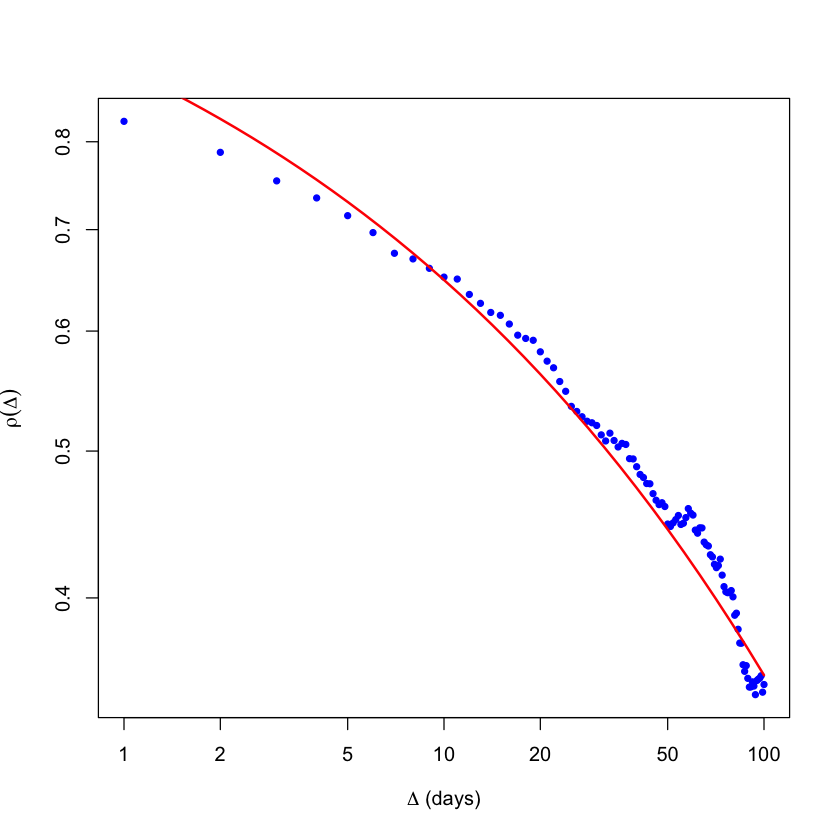

In [16]:
v <- rv.list[[1]]  # Pick spx.rk
sig <- sqrt(as.numeric(v))

aclog <-acf(log(sig),lag=100,plot=F)
plot(aclog$lag[-1],aclog$acf[-1],pch=20,ylab=expression(rho(Delta)),
     xlab=expression(paste(Delta," (days)")),log="xy",col="blue")
y <- log(aclog$acf)
(h.spx <- OxfordH$h.est[1])
x <- aclog$lag^(2*h.spx)
fit.lm <- lm(y[-1]~x[-1])
a <- fit.lm$coef[1]
b <- fit.lm$coef[2]
curve(exp(a+b*x^(2*h.est)),from=0.001,to=100,col="red",add=T,lwd=2,log="xy")

Figure 7: Here we superimpose the RFSV functional form $\rho(\Delta) \sim \exp\left\{-\frac{\nu^2}{2}\,\Delta^{2\,H}\right\}$ (in red) on the empirical curve (in blue).

### Long memory of volatility may be spurious

 
- Looking at Figures 5, 6 and 7, there is no reason to suppose that volatility is  long memory.


- Moreover, the RFSV model reproduces the observed autocorrelation function very closely.


- <span>[Gatheral, Jaisson and Rosenbaum]<sup id="cite_ref-GJR" class="reference"><a href="#cite_note-GJR"><span>[</span>6<span>]</span></a></sup> further simulate volatility in the RFSV model and apply standard estimators to the simulated data.

    - Real data and simulated data generate very similar plots and similar estimates of the long memory parameter to those found in the prior literature.

- The RSFV model does not have the long memory property.



- Classical estimation procedures seem to identify spurious long memory of volatility.
  

### Incompatibility of FSV with realized variance (RV) data}

 
  - In Figure 8, we demonstrate graphically that long memory volatility models such as FSV with $H>1/2$ are not compatible with the RV data.


  - In the FSV model, the autocorrelation function $\rho(\Delta) \propto \Delta^{2\,H-2}$.  Then, for long memory, we must have $1/2<H<1$.
    - For $\Delta \gg 1/\alpha$, stationarity kicks in and $m(2,\Delta)$ tends to a constant as $\Delta \to \infty$.
    - For $\Delta \ll 1/\alpha$, mean reversion is not significant and $m(2,\Delta) \propto \Delta^{2\,H}$.
  
 

### RFSV vs FSV

- We can compute $m(2,\Delta)$ explicitly in both the FSV and RFSV models.


- The smallest possible value of $H$ in FSV is $H=1/2$.  One empirical estimate in the literature says that $H \approx 0.53$ some time in 2008.  

- Let's see how the theoretical estimates of $m(2,\Delta)$ compare with data.

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/FsvVsRFSV.png" align = "left" width=700></h3> 

Figure 8: Black points are empirical estimates of $m(2,\Delta)$; the blue line is the FSV model with $\alpha=0.5$ and $H=0.53$; the orange line is the RFSV model with $\alpha=0$ and $H=0.14$.


### Does simulated RSFV data look real?

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/vol2.png" align = "left" width=900></h3> 

Figure 9: Volatility of SPX (above) and of the RFSV model (below).

### Remarks on the comparison

 
  - The simulated and actual graphs look very alike. 
 
  - Persistent periods of high volatility alternate with low volatility periods. 
  
  - $H \sim 0.1$ generates very rough looking sample paths (compared with $H=1/2$ for Brownian motion).
 
  - Hence *rough volatility*.
 

 
  - On closer inspection, we observe fractal-type behavior.
 
  - The graph of volatility over a small time period looks like the same graph over a much longer time period.
  
  - This feature of volatility has been investigated both empirically and theoretically in, for example, <span>[Bacry and Muzy]<sup id="cite_ref-BacryMuzy" class="reference"><a href="#cite_note-BacryMuzy"><span>[</span>3<span>]</span></a></sup>
.
 
  - In particular, their Multifractal Random Walk (MRW) is related to a limiting case of the RSFV model as $H \to 0$.
  
 

### Pricing under rough volatility

Following <span>[Bayer, Friz and Gatheral]<sup id="cite_ref-BFG" class="reference"><a href="#cite_note-BFG"><span>[</span>2<span>]</span></a></sup>, the foregoing behavior suggest the following model for volatility under the real (or historical or physical) measure $\mP$:

$$
\log \sigma_u - \log \sigma_t =\nu\,\left(W^H_u-W^H_t\right), \quad u>t.
$$

Let $\gamma=\frac{1}{2}-H$.  We choose the Mandelbrot-Van Ness representation of fractional Brownian motion $W^H$ as follows:

$$
W^H_t ={C_H}\,\left\{\int_{-\infty}^t \,\frac{dW^{\mP}_s}{(t-s)^\gamma} - \int_{-\infty}^0 \,\frac{dW^{\mP}_s}{(-s)^\gamma}\right\}
$$

where the choice

$$
C_H = \sqrt{ \frac{2\,H\,\Gamma(3/2-H)}{\Gamma(H+1/2)\,\Gamma(2-2\,H)}}
$$

ensures that
$$
\E\left[W^H_t\,W^H_s\right]= \frac{1}{2}\,\left\{t^{2 H} + s^{2 H} - |t-s|^{2 H}\right\}.
$$

Then

$$
\beas
&&\log v_u - \log v_t \nonumber\\
&=&2 \,\nu\,C_H\,\left\{ \int_t^u\,\frac{1}{(u-s)^\gamma}\,d{W}^{\mP}_s  \\+\int_{-\infty}^t\,\left[ \frac{1}{(u-s)^\gamma}-\frac{1}{(t-s)^\gamma} \right]\,d{W}^{\mP}_s\right\}\nonumber\\
&=:& 2\,\nu\,C_H\,\left[M_t(u)+ Z_t(u)\right].
\eeas
$$

- Note that $\eefm{M_t(u)}{\mP}=0$ and $Z_t(u)$ is $\cF_t$-measurable.  

  - To price options, it would seem that we would need to know $\cF_t$, the entire history of the Brownian motion $W_s$ for $s<t$!

  

### Pricing under $\mP$


Let

$$
\tilde W^{\mP}_t(u) := \sqrt{2\,H}\,\int_t^u\,\frac{dW^{\mP}_s}{(u-s)^\gamma}
$$

With 
$\eta := 2\,\nu\,C_H/\sqrt{2\,H}$ we have $2\,\nu\,C_H\, M_t(u)
= \eta\, \tilde W^{\mP}_t(u)$ so denoting the stochastic exponential by $\cE(\cdot)$, we may write

$$
\bea
v_u &=& v_t \exp\left\{  \eta \tilde W^{\mP}_t(u) +
 2\,\nu\,C_H\, 
Z_t(u) \right\}\nonumber\\
&=& \eefm{v_u}{\mP}\,\cE \left(\eta\,\tilde W^{\mP}_t(u) \right).
%\label{eq:rBergomiP}
\eea
$$  
 

  - The conditional distribution of $v_u$ depends on $\cF_t$ only through the variance forecasts $\eefm{v_u}{\mP}$, 
 
 
 - To price options, one does not need to know $\cF_t$, the entire history of the Brownian motion $W_s^{\mP}$ for $s<t$.

 

### Pricing under $\mQ$

Our model under $\mP$ reads:

<a name="eq:Pmodel"></a>(2)
$$
v_u =\eefm{v_u}{\mP}\,\cE\left(\eta\,\tilde W^{\mP}_t(u) \right).
%\label{eq:Pmodel}
$$

Consider some general change of measure

$$
dW^{\mP}_s = dW^{\mQ}_s + \lambda_s\,ds,
%\label{eq:dQdP}
$$

where $\{ \lambda_s: s > t \}$  has a natural interpretation as the price of volatility risk.  We may then rewrite [(2)](#eq:Pmodel) as

$$
v_u
=  \eefm{v_u}{\mP}\,\cE\left(\eta\,\tilde W^{\mQ}_t(u) \right)
\exp \left\{ \eta\,\sqrt{2\,H}\, \int_t^u\,\frac{\lambda_s}{(u-s)^\gamma}\,ds\right\}.
%\label{eq:explicitBergomiQ1}
$$
 

- Although the conditional distribution of $v_u$ under $\mP$ is lognormal, it will not be lognormal in general under $\mQ$.  
 
  - The upward sloping smile in VIX options means $\lambda_s$ cannot be deterministic in this picture.

### The rough Bergomi (rBergomi) model

Let's nevertheless consider the simplest change of measure 

$$
d{W}^{\mP}_s = d{W}^{\mQ}_s + \lambda(s)\,ds, 
$$

where $\lambda(s)$ is a deterministic function of $s$.  Then from [(2)](#eq:Pmodel), we would have

$$
\bea
v_u 
&=&  \eefm{v_u}{\mP}\,\cE\left(\eta\,\tilde W^{\mQ}_t(u) \right)
\exp \left\{ \eta\,\sqrt{2\,H}\,  \int_t^u\,\frac{1}{(u-s)^\gamma}\,\lambda(s)\,ds\right\}\nonumber\\
&=& \xi_t(u) \,\cE\left(\eta\,\tilde W^{\mQ}_t(u) \right)%\label{eq:explicitBergomiQ}
\eea
$$

where the forward variances $\xi_t(u) =  \eefm{v_u}{\mQ}$ are (at least in principle) tradable and  observed in the market.

 

  -  $\xi_t(u)$ is the product of two terms:
  
  - $ \eefm{v_u}{\mP}$ which depends on the historical path $\{W_s, s<t \}$ of the Brownian motion
  - a term which depends on the price of risk $\lambda(s)$.
  
  

### Features of the rough Bergomi model


 - The rBergomi model is a non-Markovian generalization of the Bergomi model:
$$
\eef{v_u}\neq \E[v_u|v_t].
$$
    - The rBergomi model is Markovian in the (infinite-dimensional) state vector $\eefm{v_u}{\mQ}=\xi_t(u)$.


  - We have achieved our earlier aim of replacing the exponential kernels in the Bergomi model with a power-law kernel.  
 
- We may therefore expect that the rBergomi model will generate a realistic term structure of ATM volatility skew.

### Re-interpretation of the conventional Bergomi model

 
  - A conventional $n$-factor Bergomi model is not self-consistent for an arbitrary choice of the initial forward variance curve $\xi_t(u)$.
 
 - $\xi_t(u)=\eef{v_u}$ should be consistent with the assumed dynamics.
  
  

- Viewed from the perspective of the fractional Bergomi model however:
 
  - The initial curve $\xi_t(u)$ reflects the history $\{W_s; s<t\}$ of the driving Brownian motion up to time $t$.
  - The exponential kernels in the exponent of the conventional Bergomi model approximate more realistic power-law kernels.
  

  - The conventional two-factor Bergomi model is then justified in practice as a tractable Markovian engineering approximation to a more realistic fractional Bergomi model.

### The stock price process

 
- The observed anticorrelation between price moves and volatility moves may be  modeled naturally by anticorrelating the Brownian motion $W$ that drives the volatility process with the Brownian motion driving the price process.  


- Thus
$$
\frac{dS_t}{S_t}=\sqrt{v_t}\,dZ_t
$$
with
$$
dZ_t = \rho\,dW_t + \sqrt{1-\rho^2}\,dW^\perp_t
$$
where $\rho$ is the correlation between volatility moves and price moves.
  

### A Hawkes model of price formation

<span>[Jaisson and Rosenbaum]<sup id="cite_ref-JaissonRosenbaum" class="reference"><a href="#cite_note-JaissonRosenbaum"><span>[</span>9<span>]</span></a></sup> considered a generalization of a simple model of price dynamics in terms of Hawkes processes due to  Bacry and Muzy with the following properties:

- Reflecting the high degree of endogeneity of the market, the $L^1$ norm  of the kernel matrix is close to one (nearly unstable).
- No drift in the price process imposes a relationship between buy and sell kernels.
- Liquidity asymmetry: The average impact of a sell order is greater than the impact of a buy order.
- Splitting of metaorders motivates power-law decay of the Hawkes kernels  $\varphi(\tau) \sim \tau^{-(1+\alpha)}$ (empirically $\alpha \approx 0.6$).

### The scaling limit of the price model

They also showed that after a suitable rescaling in time and space, the long term limit of the Hawkes price model is given by the following Rough Heston dynamics:

$$
\beas
\frac{dS_t}{S_t} &=& \sqrt{v_t}\,dZ_t\\
v_t &=& v_0 + \frac{\lambda}{\Gamma(\alpha)}\,\int_0^t\,\frac{\theta-v_s}{(t-s)^{1-\alpha}}\,ds + 
\frac{\lambda\,\nu}{\Gamma(\alpha)}\,\int_0^t\,\frac{\sqrt{v_s}\,dW_s}{(t-s)^{1-\alpha}}
\eeas
$$

with

$$
d\angl{Z,W}_t = \rho\,dt.
$$

- The correlation $\rho$ is related to a liquidity asymmetry parameter.

### The characteristic function

Define the fractional integral and differential operators:

$$
I^{1-\alpha} f(t) = \frac{1}{\Gamma(1-\alpha)}\,\int_0^t\,\frac{f(s)}{(t-s)^\alpha}\,ds;\quad D^\alpha f(t) = \frac{d}{dt}\,I^{1-\alpha} f(t).
$$


Remarkably, <span>[El Euch and Rosenbaum]<sup id="cite_ref-ElEuchRosenbaum" class="reference"><a href="#cite_note-ElEuchRosenbaum"><span>[</span>6<span>]</span></a></sup> have computed the following expression for the characteristic function of the Rough Heston model:

$$
\phi_t(u) = \exp\left\{   \int_0^t\,g(u,s)\,ds + \frac{v_0}{\lambda\,\nu} \,  I^{1-\alpha} g(u,t)    \right\}.
$$

Here $g(u,\cdot)$ solves the fractional Riccati equation

$$
D^\alpha g(u,s) = -\frac{\lambda\,\theta}{2}\,u\,(u+i) + \lambda\,(i\,\rho\,\nu\,u -1)\, g(u,s) + \frac{\lambda\,\nu^2}{2\,\theta} \, g^2(u,s).
$$

- This is a fractional version of the conventional Heston Riccati equation.

### Simulation of the  rBergomi model

We simulate the rBergomi model as follows:
 


- Construct the  joint covariance matrix for the Volterra process $\tilde
  W$ and the Brownian motion $Z$ and compute its Cholesky decomposition.


- For each time, generate iid normal random vectors and
    multiply them by the lower-triangular matrix obtained by the Cholesky
    decomposition to get a $m \times 2\,n$ matrix of paths of $\tilde W$     and $Z$ with the correct joint marginals.

- With these paths held in memory, we may evaluate the expectation under $\mQ$ of any payoff of interest.




- This procedure is very slow!  We need a faster computation.

  

### Hybrid simulation of BSS processes

- The Rough Bergomi variance process is a special case of a Brownian Semistationary (BSS) process.


- In a 2015 paper, <span>[Bennedsen, Lunde and Pakkanen]<sup id="cite_ref-BLP" class="reference"><a href="#cite_note-BLP"><span>[</span>4<span>]</span></a></sup> showed how to simulate such processes more efficiently.

- Their idea is roughly as follows:
$$
\beas
\int_t^u\,\frac{dW_s}{(u-s)^\gamma} &=& \sum_{k=1}^{n}\, \int_{t_{k+1}}^{t_k}\,\frac{dW_s}{(u-s)^\gamma}\\ &\approx&
\sum_{k=1}^{\kappa}\, \int_{t_{k+1}}^{t_k}\,\frac{dW_s}{(u-s)^\gamma} + \sum_{k=\kappa+1}^n\,\frac{1}{(u-s_k)^\gamma}\, \int_{t_{k+1}}^{t_k}\,dW_s\\
&=&
\sum_{k=1}^{\kappa}\, \int_{t_{k+1}}^{t_k}\,\frac{dW_s}{(u-s)^\gamma} + \sum_{k=\kappa+1}^n\,\frac{1}{(u-s_k)^\gamma}\, Z_k\,\sqrt{\frac{u-t}{n}}
\eeas
$$
where
$
t_k = u - \frac k n (u-t)
$,
the $Z_k$ are iid $N(0,1)$ random variables and the 
$
s_k  
$
are such that
$$
\int_{t_{k+1}}^{t_k}\,\frac{ds}{(u-s)^\gamma} = \frac{1}{(u-s_k)^\gamma}.
$$

- The choice $\kappa =1$ works well in practice.
- The choice $\kappa = 0$ corresponds to the Euler scheme which as expected performs poorly.

### Guessing rBergomi model parameters

 
- The rBergomi model has only three parameters: $H$, $\eta$ and $\rho$.


- If we had a fast simulation, we could just iterate on these parameters to find the best fit to observed option prices.  But we don't.

- However, the model parameters $H$, $\eta$ and $\rho$ have very direct interpretations:
 
    - $H$ controls the decay of ATM skew $\psi(\tau)$ for very short expirations.
    
    - The product $\rho\,\eta$ sets the level of the ATM skew for longer expirations.
    
      - Keeping  $\rho\,\eta$ constant but decreasing $\rho$ (so as to make it more negative) pushes the minimum of each smile towards higher strikes. 
  

- So we can guess parameters in practice.


- As we will see, even without proper calibration (*i.e.* just guessing parameters), rBergomi model fits to the volatility surface are amazingly good.

### Parameter estimation from historical data

 
- Both the roughness parameter (or Hurst parameter) $H$ and the volatility of volatility $\eta$ should be the same under $\mP$ and $\mQ$.  


- Earlier, using the Oxford-Man realized variance dataset, we estimated  the Hurst parameter  $H_{eff} \approx 0.14$ and volatility of volatility $\nu_{eff} \approx 0.3$.  


- However,  we not observe the instantaneous volatility $\sigma_t$, only  $\frac{1}{\delta}\,\int_0^\delta \sigma_t^2\,dt$ where $\delta$  is roughly $3/4$ of a whole day from close to close.  
  - Using Appendix C of <span>[Gatheral, Jaisson and Rosenbaum]<sup id="cite_ref-GJR" class="reference"><a href="#cite_note-GJR"><span>[</span>9<span>]</span></a></sup>
, we rescale finding $H \approx 0.05$ and $\nu \approx 1.7$.    
  
  

- Also, recall that
$$
\eta = 2\,\nu\,\frac{C_H}{\sqrt{2\,H}} =  2\,\nu\,\sqrt{ \frac{\Gamma(3/2-H)}{\Gamma(H+1/2)\,\Gamma(2-2\,H)}}
$$
which yields the estimate 
$
\eta \approx 2.5
$.

### SPX smiles in the rBergomi model

 
- In Figures 9 and 10, we show how well a rBergomi model simulation with guessed parameters fits the SPX option market as of February 4, 2010, a day when the ATM volatility term structure happened to be pretty flat.  
 
   - rBergomi parameters were: $H=0.07$, $\eta=1.9$, $\rho=-0.9$.
  
 

- Only three parameters to get a very good fit to the whole SPX volatility surface!

### rBergomi fits to SPX smiles as of 04-Feb-2010

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/spxSmiles20140204-07.png" align = "left" width=900></h3> 

Figure 10: Red and blue points represent bid and offer SPX implied volatilities; orange smiles are from the rBergomi simulation.

### Shortest dated smile as of February 4, 2010

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/spxSmiles20140204-07-1.png" align = "left" width=900></h3> 

Figure 11: Red and blue points represent bid and offer SPX implied volatilities; orange smile is from the rBergomi simulation.


### ATM volatilities and skews

In Figures 12 and 13, we see just how well the rBergomi model can match empirical skews and vols.  Recall also that the parameters we used are just guesses!

### Term structure of ATM skew as of February 4, 2010

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/atmSkew20100204.png" align = "left" width=900></h3> 

Figure 12: Blue points are empirical skews; the red line is from the rBergomi simulation.

### Term structure of ATM vol as of February 4, 2010

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/atmVols20100204.png" align = "left" width=900></h3> 

Figure 13: Blue points are empirical ATM volatilities; the red line is from the rBergomi simulation.

### Another date

 
  - Now we take a look at another date: August 14, 2013, two days before the last expiration date in our dataset.
 
 
  - Options set at the open of August 16, 2013 so only one trading day left.
  
  
  - Note in particular that the extreme short-dated smile is well reproduced by the rBergomi model.
 
 
  - There is no need to add jumps!
  

### SPX smiles as of August 14, 2013

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/spxSmiles20130814-05.png" align = "left" width=900></h3> 

Figure 14: Red and blue points represent bid and offer SPX implied volatilities; orange smiles are from the rBergomi simulation.

### The forecast formula

 
- In the RFSV model [(1)](#eq:dataDriven), $\log \sigma_t \approx \nu\,W^H_t+C$ for some constant $C$.


-  <span>[Nuzman and Poor]<sup id="cite_ref-NuzmanPoor" class="reference"><a href="#cite_note-NuzmanPoor"><span>[</span>10<span>]</span></a></sup> show that $W^H_{t+\Delta}$ is conditionally Gaussian with conditional expectation

$$\E[W^H_{t+\Delta}|\cF_t]=\frac{\cos(H\pi)}{\pi} \Delta^{H+1/2} \int_{-\infty}^t \frac{W^H_s}{(t-s+\Delta)(t-s)^{H+1/2}} ds
$$  

and conditional variance

$$
\text{Var}[W^H_{t+\Delta}|\cF_t]=c\,\Delta^{2H}.
$$
where $$
c = \frac{\Gamma(3/2-H)}{\Gamma(H+1/2)\,\Gamma(2-2H)}.
$$

 

### The forecast formula
 
Thus, we obtain 

<blockquote><div style="background-color:#add8e6; color:#FFFFFF; font-style: normal;  " ><h4>
Variance forecast formula</h4>
</div>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>

<a name="eq:vForecast"></a>(3)
$$
\eefm{v_{t+\Delta}}{\mP}=\exp\left\{\eefm{\log(v_{t+\Delta})}{\mP}+2\, c\,\nu^2\Delta^{2\,H}\right\}
%\label{eq:vForecast}
$$

<br>

</div>

</blockquote>

where 

$$
\beas
&&\eefm{\log v_{t+\Delta}}{\mP}\\
&&= \frac{\cos(H\pi)}{\pi} \Delta^{H+1/2} \int_{-\infty}^t \frac{\log v_s}{(t-s+\Delta)(t-s)^{H+1/2}} ds.
\eeas
$$

### Implement variance forecast in R

In [17]:
# Find all of the dates
dateIndex <- substr(as.character(index(spx.rk)),1,10) # Create index of dates

cTilde <- function(h){gamma(3/2-h)/(gamma(h+1/2)*gamma(2-2*h))} # Factor because we are computing conditional on \cF_t

# XTS compatible version of forecast
rv.forecast.XTS <- function(rvdata,h,date,nLags,delta,nu){
  i <- (1:nLags)-1
  cf <- 1/((i+1/2)^(h+1/2)*(i+1/2+delta)) # Lowest number should apply to latest date
  datepos <- which(dateIndex==date)
  ldata <- log(as.numeric(rvdata[datepos-i])) # Note that this object is ordered from earlier to later
  pick <- which(!is.na(ldata))
  norm <- sum(cf[pick])
  fcst <- cf[pick]%*%ldata[rev(pick)]/norm # Most recent dates get the highest weight
  return(exp(fcst+2*nu^2*cTilde(h)*delta^(2*h)))
}

### SPX actual vs forecast variance

In [18]:
rvdata <- spx.rk
nu <- OxfordH$nu.est[1] # Vol of vol estimate for SPX
n <- length(rvdata)
delta <- 1
nLags <- 500
range <- nLags:(n-delta)
rv.predict <- sapply(dateIndex[range],function(d){rv.forecast.XTS(rvdata,h=h.est,d,nLags=nLags,delta=delta,nu=nu)})
rv.actual <- rvdata[range+delta]

### Scatter plot of delta days ahead predictions

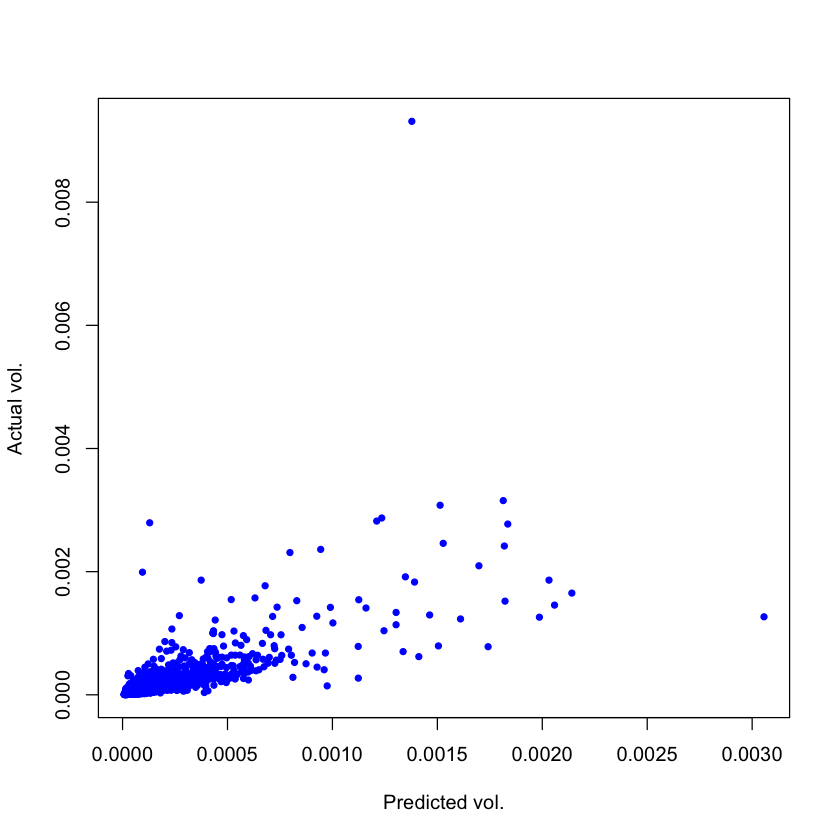

In [19]:
x <- as.numeric(rv.predict)
y <- as.numeric(rv.actual)
plot(x,y,col="blue",pch=20, ylab="Actual vol.", xlab="Predicted vol.")


Figure 15: Actual vols vs predicted vols.

### Superimpose actual and predicted vols

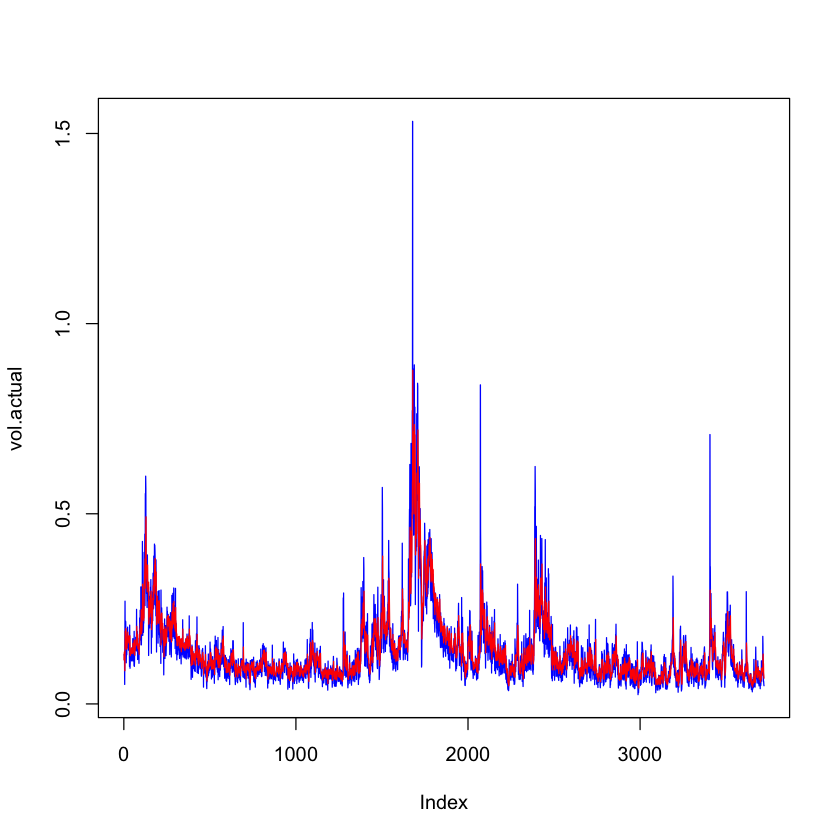

In [20]:
vol.actual <- sqrt(as.numeric(rv.actual)*252)
vol.predict <- sqrt(rv.predict*252)
plot(vol.actual, col="blue",type="l")
lines(vol.predict, col="red",type="l")

Figure 16: Actual volatilities in blue; predicted vols in red.

### Forecasting the variance swap curve

Finally, we forecast the whole variance swap curve using the variance forecasting formula [(3)](#eq:vForecast).


In [21]:
library(stinepack)

xi1 <- function(date,nu,h,dt, tscale){ # dt=(u-t) is in units of years
  xi <- rv.forecast.XTS(spx.rk,h=h,date=date,nLags=500,delta=dt*tscale,nu)
  return(xi)
}

# Forward variance curve (again the array tt should be in units of years)
xi <- function(date,tt,nu,h, tscale){sapply(tt,function(x){xi1(date,nu=nu,h=h,x,tscale)})}


nu <- OxfordH$nu.est[1]
h <- OxfordH$h.est[1]

varSwapCurve <- function(date,bigT,nSteps,nu,h,tscale,onFactor){
  # Make vector of fwd variances
  tt <- seq(0,bigT,length.out=(nSteps+1))
  dt <- tt[2]
  xicurve <- xi(date,tt,nu,h,tscale)
  xicurve.mid <- (xicurve[1:nSteps]+xicurve[2:(nSteps+1)])/2
  int.xicurve <- cumsum(xicurve.mid)*dt
  varcurve <- int.xicurve/tt[-1]
  varcurve <- c(xicurve[1], varcurve)*onFactor*tscale #onFactor is to compensate for overnight moves
  res <- data.frame(tt,sqrt(varcurve))
  names(res) <- c("texp","vsQuote")
  return(res)
}

varSwapForecast <- function(date,tau,nu,h,tscale,onFactor){
  vsc <- varSwapCurve(date,bigT=2.5,nSteps=100,nu=nu,h=h,tscale,onFactor) # Creates the whole curve
  x <- vsc$texp
  y <- vsc$vsQuote
  res <- stinterp(x,y,tau)$y
  return(res)
}

# Test the function
tau <- c(.25,.5,1,2)
date <- "2008-09-08"
varSwapForecast(date,tau,nu=nu,h=h,tscale=252,onFactor=1)

[1] 0.2199723 0.2164123 0.2161702 0.2192031

### Constructing a time series of variance swap curves

For each of 2,658 days from Jan 27, 2003 to August 31, 2013:
 
  - We compute proxy variance swaps from closing prices of SPX options sourced from OptionMetrics (www.optionmetrics.com) via WRDS.
  
  
  - We form the forecasts $\eefm{v_u}{\mP}$ using [(3)](#eq:vForecast) with 500 lags of SPX RV data sourced from The Oxford-Man Institute of Quantitative Finance (http://realized.oxford-man.ox.ac.uk).
 
 

 
   - We note that the actual variance swap curve is a factor (of roughly 1.4) higher than the forecast, which we may attribute to a combination of overnight movements of the index and the price of volatility risk.
 
 
 - Forecasts must therefore be rescaled to obtain close-to-close realized variance forecasts.

### 3-month forecast vs actual variance swaps

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/vsfa3m.png" align = "left" width=900></h3> 

Figure 17: Actual (proxy) 3-month variance swap quotes in blue vs forecast in red (with no scaling factor).

### Ratio of actual to forecast

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/3mratio.png" align = "left" width=900></h3>

Figure 18: The ratio between 3-month actual variance swap quotes and 3-month forecasts.

### The Lehman weekend

 
  -  Empirically, it seems that the variance curve is a simple scaling factor times the forecast, but that this scaling factor is time-varying.
  
      - We can think of this factor as having two multiplicative components: the overnight factor, and the price of volatility risk.



  - Recall that as of the close on Friday September 12, 2008, it was widely believed that Lehman Brothers would be rescued over the weekend. By Monday morning, we knew that Lehman had failed. 

- In Figure 19, we see that variance swap curves just before and just after the collapse of Lehman are just rescaled versions of the RFSV forecast curves.

  

### We need variance swap estimates for 12-Sep-2008 and 15-Sep-2008

We proxy these by taking SVI fits for the two dates and computing the log-strips.

In [22]:
varSwaps12 <- c(
    0.2872021, 0.2754535, 0.2601864, 0.2544684, 0.2513854, 0.2515314,
    0.2508418, 0.2520099, 0.2502763, 0.2503309, 0.2580933, 0.2588361, 
    0.2565093)

texp12 <- c(
    0.01916496, 0.04654346, 0.09582478, 0.19164956, 0.26830938, 0.29842574,
    0.51745380, 0.54483231, 0.76659822, 0.79397673, 1.26488706, 1.76317591, 
    2.26146475)

varSwaps15 <-  c(
    0.4410505, 0.3485560, 0.3083603, 0.2944378, 0.2756881, 0.2747838, 
    0.2682212, 0.2679770, 0.2668113, 0.2706713, 0.2729533, 0.2689598, 
    0.2733176)

texp15 <- c(
    0.01095140, 0.03832991, 0.08761123, 0.18343600, 0.26009582, 0.29021218, 
    0.50924025, 0.53661875, 0.75838467, 0.78576318, 1.25667351, 1.75496235, 
    2.25325120)

### Actual vs predicted over the Lehman weekend


In [23]:
nu <- OxfordH$nu.est[1]
h <- OxfordH$h.est[1]

# Variance curve fV model forecasts
tau1000 <- seq(0,2.5,length.out=1001)[-1]
vs1 <- varSwapForecast("2008-09-12",tau1000,nu=nu,h=h,tscale=252,onFactor=1.29)
vs2 <- varSwapForecast("2008-09-15",tau1000,nu=nu,h=h,tscale=252,onFactor=1.29)

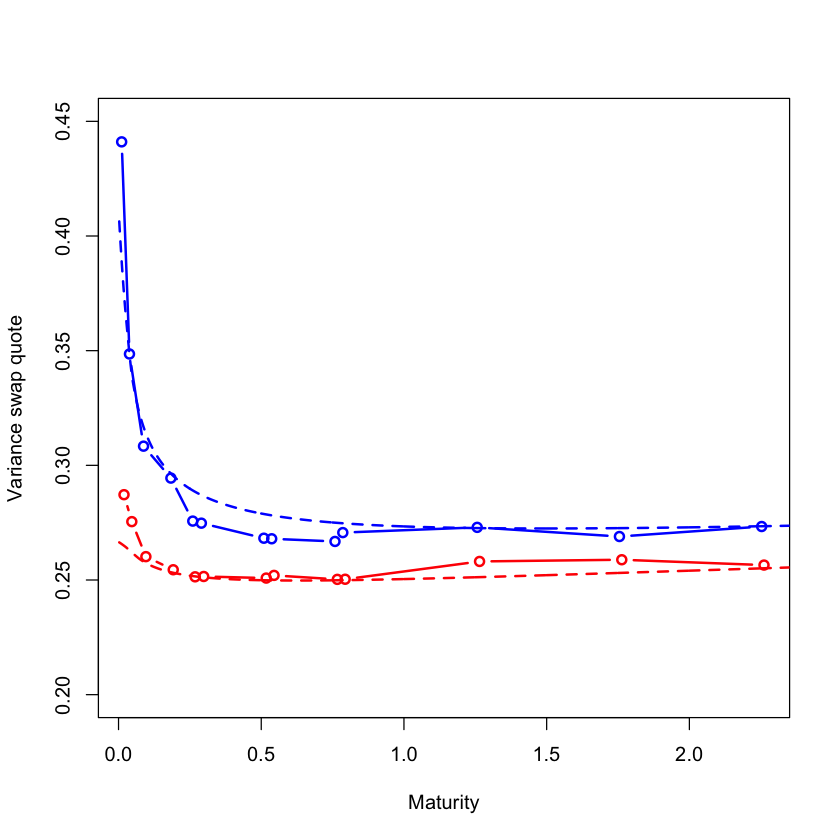

In [24]:
# Plot results
plot(texp12,varSwaps12,type="b",col="red",ylim=c(0.2,0.45),xlab="Maturity",ylab="Variance swap quote",lwd=2)
lines(texp15,varSwaps15,type="b",col="blue",lwd=2)
lines(tau1000,vs1,col="red",type="l",lty=2,lwd=2)
lines(tau1000,vs2,col="blue",type="l",lty=2,lwd=2)

Figure 19: SPX variance swap curves as of September 12, 2008 (red) and September 15, 2008 (blue). The dashed curves are RFSV model forecasts rescaled by the 3-month ratio ($1.29$) as of the Friday close.

### Remarks

We note that
 
  - The actual variance swaps curves are very close to the forecast curves, up to a scaling factor.
  
  
  - We are able to explain the change in the variance swap curve with only one extra observation: daily variance over the trading day on Monday 15-Sep-2008. 
 
 
 - The SPX options market appears to be backward-looking in a very sophisticated way.

 

### The Flash Crash

 
- The so-called Flash Crash of Thursday May 6, 2010 caused  intraday realized variance to be much higher than normal.   
  
  
- In Figure 19, we plot the actual variance swap curves as of the Wednesday and Friday market closes together with forecast curves rescaled by the 3-month ratio as of the close on Wednesday May 5 (which was $2.52$).  
  
  
- We see that the actual variance curve as of the close on Friday is consistent with a forecast from the time series of realized variance that *includes* the anomalous price action of Thursday May 6. 

### Variance swap estimates 

We again proxy variance swaps for 05-May-2010, 07-May-2010 and 10-May-2010 by taking SVI fits for the three dates and computing the log-strips.

In [25]:
varSwaps5 <- c(
    0.4250369, 0.2552473, 0.2492892, 0.2564899, 0.2612677, 0.2659618, 0.2705928, 0.2761203,
    0.2828139, 0.2841165, 0.2884955, 0.2895839, 0.2927817, 0.2992602, 0.3116500)

texp5 <- c(
    0.002737851, 0.043805613, 0.120465435, 0.150581793, 0.197125257, 0.292950034,
    0.369609856, 0.402464066, 0.618754278, 0.654346338, 0.867898700, 0.900752909,
    1.117043121, 1.615331964, 2.631074606)
 
varSwaps7 <- c(
    0.5469727, 0.4641713, 0.3963352, 0.3888213, 0.3762354, 0.3666858, 0.3615814, 0.3627013,
    0.3563324, 0.3573946, 0.3495730, 0.3533829, 0.3521515, 0.3506186, 0.3594066)

texp7 <- c(
    0.01642710, 0.03832991, 0.11498973, 0.14510609, 0.19164956, 0.28747433, 0.36413415,
    0.39698836, 0.61327858, 0.64887064, 0.86242300, 0.89527721, 1.11156742, 1.60985626,
    2.62559890)

varSwaps10 <- c(
    0.3718439, 0.3023223, 0.2844810, 0.2869835, 0.2886912, 0.2905637, 0.2957070, 0.2960737,
    0.3005086, 0.3031188, 0.3058492, 0.3065815, 0.3072041, 0.3122905, 0.3299425)

texp10 <- c(
    0.008213552, 0.030116359, 0.106776181, 0.136892539, 0.183436003, 0.279260780,
    0.355920602, 0.388774812, 0.605065024, 0.640657084, 0.854209446, 0.887063655,
    1.103353867, 1.601642710, 2.617385352)


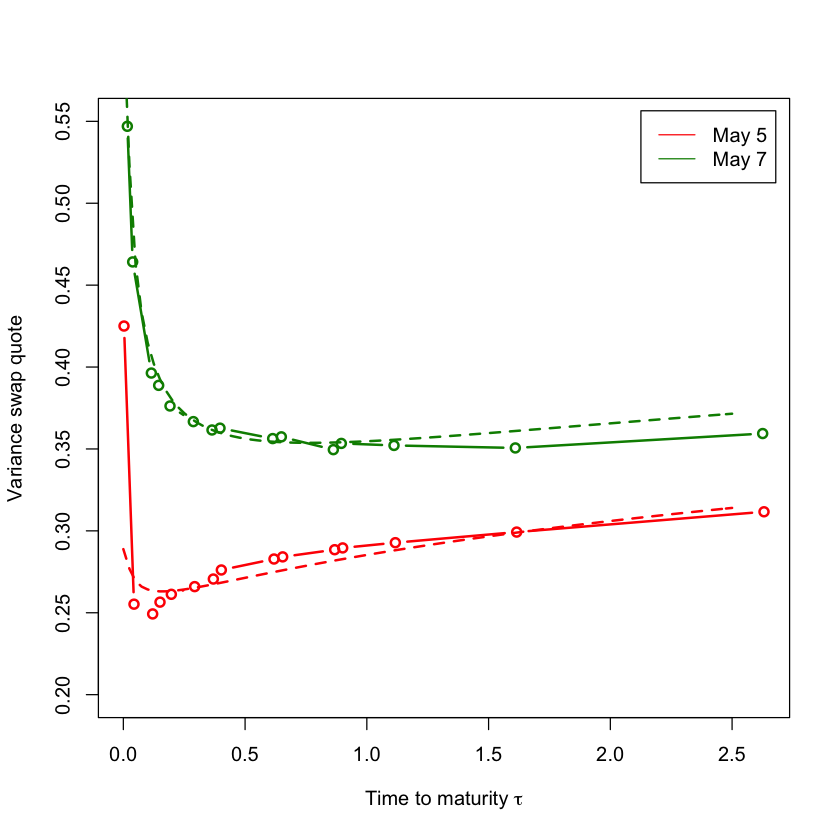

In [26]:
# Variance curve fV model forecasts
vsf5 <- varSwapCurve("2010-05-05",bigT=2.5,nSteps=100,nu=nu,h=h,tscale=252,onFactor=2.52)
vsf7 <- varSwapCurve("2010-05-07",bigT=2.5,nSteps=100,nu=nu,h=h,tscale=252,onFactor=2.52)

plot(texp5,varSwaps5,type="b",col="red",xlab=expression(paste("Time to maturity ",tau)),ylab="Variance swap quote",lwd=2,ylim=c(0.2,.55))
lines(texp7,varSwaps7,type="b",col="green4",lwd=2)
legend("topright",inset=.02,c("May 5","May 7"),lty=1,col=c("red","green4"))

lines(vsf5,col="red",type="l",lty=2,lwd=2)
lines(vsf7,col="green4",type="l",lty=2,lwd=2)


Figure 20: SPX variance swap curves as of May 5, 2010 (red) and May 7, 2010 (green). The dashed curves are RFSV model forecasts rescaled by the 3-month ratio ($2.52$) as of the close on Wednesday May 5.  The curve as of the close on May 7 is consistent with the forecast **including** the crazy moves on May 6.


### The weekend after the Flash Crash

Now we plot forecast and actual variance swap curves as of the close on Friday May 7 and Monday May 10.

In [27]:
# Variance curve fV model forecasts
vsf7 <- varSwapCurve("2010-05-07",bigT=2.5,nSteps=100,nu=nu,h=h,tscale=252,onFactor=2.52)
vsf10 <- varSwapCurve("2010-05-10",bigT=2.5,nSteps=100,nu=nu,h=h,tscale=252,onFactor=2.52)

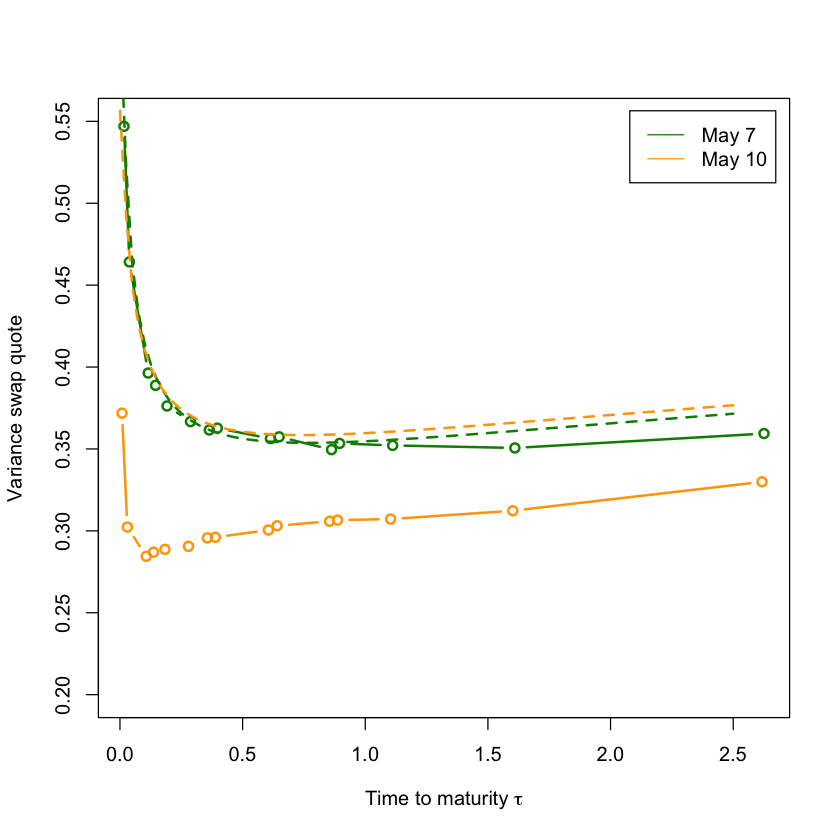

In [28]:
plot(texp7,varSwaps7,type="b",col="green4",xlab=expression(paste("Time to maturity ",tau)),ylab="Variance swap quote",lwd=2,ylim=c(0.2,.55))
lines(texp10,varSwaps10,type="b",col="orange",lwd=2)
legend("topright",inset=.02,c("May 7","May 10"),lty=1,col=c("green4","orange"))

lines(vsf7,col="green4",type="l",lty=2,lwd=2)
lines(vsf10,col="orange",type="l",lty=2,lwd=2)

Figure 21: The May 10 actual curve is  inconsistent with a forecast that includes the Flash Crash.  


Now let's see what happens if we exclude the Flash Crash from the time series used to generate the variance curve forecast. 

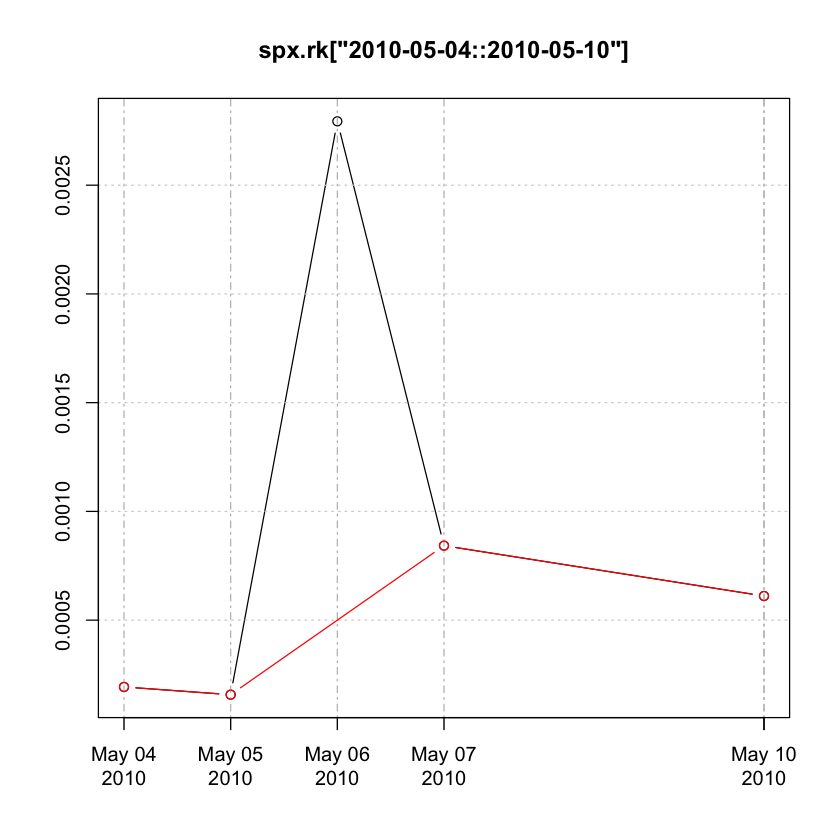

In [29]:
flash.day <- which(index(spx.rk)=="2010-05-06")
spx.rk.p <- spx.rk[-flash.day]
plot(spx.rk["2010-05-04::2010-05-10"],type="b")
lines(spx.rk.p["2010-05-04::2010-05-10"],col="red",type="b")

Figure 22: spx.rk.p has the May 6 realized variance datapoint eliminated.  Notice the crazy realized variance estimate for May 6!

We need a new variance curve forecast function that uses the new time series.

In [30]:
xi1p <- function(date,nu,h,dt, tscale){ # dt=(u-t) is in units of years
  xi <- rv.forecast.XTS(spx.rk.p,h=h,date=date,nLags=500,delta=dt*tscale,nu)
  return(xi)
}

# Forward variance curve (again the array tt should be in units of years)
xip <- function(date,tt,nu,h, tscale){sapply(tt,function(x){xi1p(date,nu=nu,h=h,x,tscale)})}

varSwapCurve.p <- function(date,bigT,nSteps,nu,h,tscale,onFactor){
  # Make vector of fwd variances
  tt <- seq(0,bigT,length.out=(nSteps+1))
  dt <- tt[2]
  xicurve <- xip(date,tt,nu,h,tscale)
  xicurve.mid <- (xicurve[1:nSteps]+xicurve[2:(nSteps+1)])/2
  int.xicurve <- cumsum(xicurve.mid)*dt
  varcurve <- int.xicurve/tt[-1]
  varcurve <- c(xicurve[1], varcurve)*onFactor*tscale #onFactor is to compensate for overnight moves
  res <- data.frame(tt,sqrt(varcurve))
  names(res) <- c("texp","vsQuote")
  return(res)
}

varSwapForecast.p <- function(date,tau,nu,h,tscale,onFactor){
  vsc <- varSwapCurve.p(date,bigT=2.5,nSteps=100,nu=nu,h=h,tscale,onFactor) # Creates the whole curve
  x <- vsc$texp
  y <- vsc$vsQuote
  res <- stinterp(x,y,tau)$y
  return(res)
}

# Test the function
tau <- c(.25,.5,1,2)
date <- "2010-05-10"
varSwapForecast.p(date,tau,nu=nu,h=h,tscale=252,onFactor=1/(1-.35))

[1] 0.2417049 0.2425550 0.2496414 0.2631633

Finally, we compare our new forecast curves with the actuals.

In [31]:
# Variance curve fV model forecasts
vsf7 <- varSwapCurve("2010-05-07",bigT=2.5,nSteps=100,nu=nu,h=h,tscale=252,onFactor=2.52)
vsf10p <- varSwapCurve.p("2010-05-10",bigT=2.5,nSteps=100,nu=nu,h=h,tscale=252,onFactor=2.52)

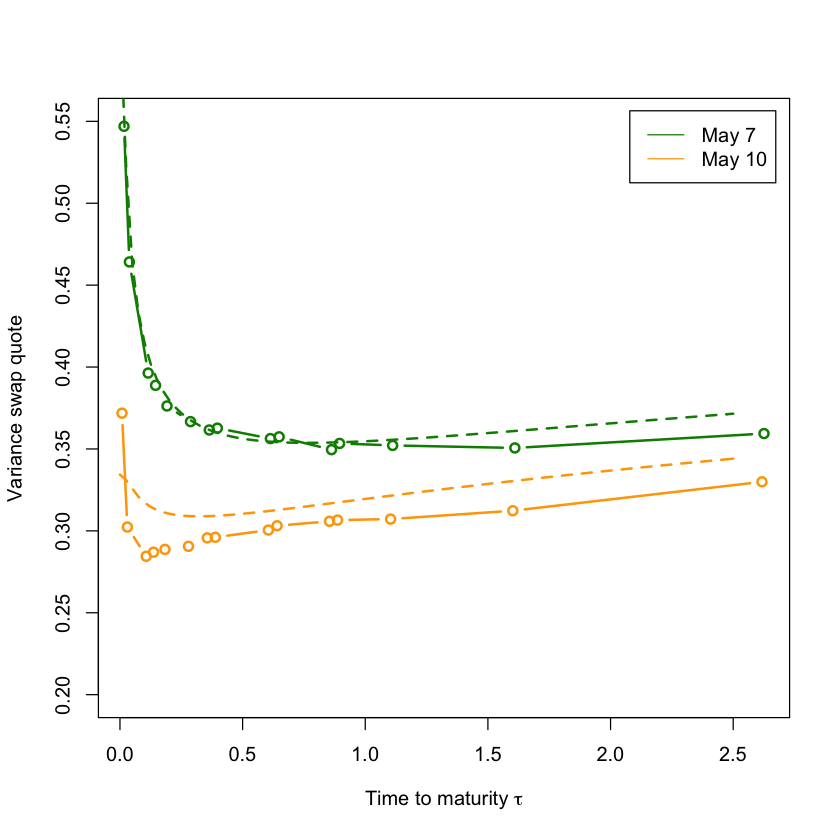

In [32]:
plot(texp7,varSwaps7,type="b",col="green4",xlab=expression(paste("Time to maturity ",tau)),ylab="Variance swap quote",lwd=2,ylim=c(0.2,.55))
lines(texp10,varSwaps10,type="b",col="orange",lwd=2)
legend("topright",inset=.02,c("May 7","May 10"),lty=1,col=c("green4","orange"))

lines(vsf7,col="green4",type="l",lty=2,lwd=2)
lines(vsf10p,col="orange",type="l",lty=2,lwd=2)

Figure 23: The May 10 actual curve is consistent with a forecast that excludes the Flash Crash.

###  Resetting of expectations over the weekend  
  
  -  In Figures 21 and 23, we see that the actual variance swap curve on Monday, May 10  is consistent with a  forecast that excludes the  Flash Crash.
 
 
  - Volatility traders realized that the Flash Crash should not influence future realized variance projections.

### Summary

 
  - We uncovered a remarkable monofractal scaling relationship in historical volatility.
 
      - A corollary is that volatility is not a long memory process, as widely believed.
  
  
  - This leads to a natural non-Markovian stochastic volatility model under $\mP$.
  
  
  - The simplest specification of $\frac{d\mQ}{d\mP}$ gives a non-Markovian generalization of the Bergomi model.
 

  
  - The history of the Brownian motion $\lbrace W_s, s<t\rbrace $ required for pricing is encoded in the forward variance curve, which is observed in the market.
  

  - This model fits the observed volatility surface surprisingly well with very few parameters.
 
 
 
- For perhaps the first time, we have a simple consistent model of historical and implied volatility.

 

### References  

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>

<li id="cite_note-ABDE"><span class="mw-cite-backlink"><b><a href="#cite_ref-ABDE">^</a></b></span>
Torben G Andersen, Tim Bollerslev, Francis X Diebold, and Heiko Ebens, The distribution of realized stock return volatility, *Journal of Financial Economics* **61**(1) 43-76 (2001).
</li>

<li id="cite_note-BFG"><span class="mw-cite-backlink"><b><a href="#cite_ref-BFG">^</a></b></span> 
Christian Bayer, Peter Friz and Jim Gatheral, Pricing under rough volatility, *Quantitative Finance* **16**(6) 887-904 (2016).
</li>
 
<li id="cite_note-BacryMuzy"><span class="mw-cite-backlink"><b><a href="#cite_ref-BacryMuzy">^</a></b></span>
Emmanuel Bacry and Jean-François Muzy, Log-infinitely divisible multifractal processes, 
*Communications in Mathematical Physics* **236**(3) 449-475 (2003).</li>
 
<li id="cite_note-BLP"><span class="mw-cite-backlink"><b><a href="#cite_ref-BLP">^</a></b></span>
Mikkel Bennedsen, Asger Lunde, and Mikko S. Pakkanen, Hybrid scheme for Brownian semistationary processes, available at http://arxiv.org/abs/1507.03004, (2015).</li>

<li id="cite_note-ComteRenault"><span class="mw-cite-backlink"><b><a href="#cite_ref-ComteRenault">^</a></b></span> 
Fabienne Comte and Eric Renault, Long memory in continuous-time stochastic volatility models, *Mathematical Finance* **8** 29-323(1998).</li>

<li id="cite_note-ElEuchRosenbaum"><span class="mw-cite-backlink"><b><a href="#cite_ref-ElEuchRosenbaum">^</a></b></span> 
Omar El Euch and Mathieu Rosenbaum, The characteristic function of rough Heston models, available at https://arxiv.org/abs/1609.02108, (2016).</li>


<li id="cite_note-GJR"><span class="mw-cite-backlink"><b><a href="#cite_ref-GJR">^</a></b></span> Jim Gatheral, Thibault Jaisson and Mathieu Rosenbaum, Volatility is rough, available at http://papers.ssrn.com/sol3/papers.cfm?abstract_id=2509457, (2014).</li>



<li id="cite_note-GO"><span class="mw-cite-backlink"><b><a href="#cite_ref-GO">^</a></b></span> Jim Gatheral and Roel Oomen, Zero-intelligence realized variance estimation, *Finance and Stochastics* **14**(2) 249-283 (2010).</li> 

<li id="cite_note-JaissonRosenbaum"><span class="mw-cite-backlink"><b><a href="#cite_ref-JaissonRosenbaum">^</a></b></span> Thibault Jaisson and Mathieu Rosenbaum, Rough fractional diffusions as scaling limits of nearly unstable heavy tailed Hawkes processes, available at https://arxiv.org/pdf/1504.03100.pdf, (2015).</li>


<li id="cite_note-NuzmanPoor"><span class="mw-cite-backlink"><b><a href="#cite_ref-NuzmanPoor">^</a></b></span> Carl J. Nuzman and H. Vincent Poor, Linear estimation of self-similar processes via Lamperti’s transformation, *Journal of Applied Probability* **37**(2) 429-452 (2000).</li>
 
 

</ol>
  


 